In [1]:
import pandas as pd
import numpy as np
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            continue
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [2]:
import nltk
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [3]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(['amp', 'via', 'co', 'rt', 'hurricane', 'sandy', 'hurricanesandy'])

In [4]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if (len(token) > 4 and token not in stopwords)]
    tokens = [get_lemma(token) for token in tokens]
    
    return tokens

In [5]:
def filtered_frame(hashtag_list):
    
    # First we make a search query based on the input hashtag list
    first = True
    query = ''
    for item in hashtag_list:
        if first:
            first = False
            query += item
        else:
            query += ('|' + item)
    
    # Next we find all entries that match that query
    tag_index = df['text'].str.lower().str.contains(query)
    tag_df = df[tag_index].copy().reset_index()
    # Here we're finding all the mentions in this user's tweet
    tag_df['mentions'] = tag_df['text'].apply(lambda x: re.findall('(@[A-Za-z0-9_]+)', x))
    tag_df = pd.merge(tag_df, user_info[['id', 'screen_name']], how='left', left_on='user_id', right_on='id')
    # Some users have protected info, so we can't access it
    # We'll drop these entries because they won't be helpful in making an edge
    tag_df = tag_df.dropna()
    
    mentions_list = tag_df['mentions'].tolist()
    user_list = tag_df['screen_name'].tolist()
    tweet_id = tag_df['tweet_id'].tolist()

    from_user, to_user, tweet_id_list = [], [], []

    # Now we'll take the new dataframe and make a 1 to 1 matching of users and mentions
    for i in range(len(user_list)):
        mentions = mentions_list[i]
        for mention in mentions:
            to_user.append(mention.strip('@'))
            from_user.append(user_list[i])
            tweet_id_list.append(tweet_id[i])
    edge_df = pd.DataFrame({'Source':from_user, 'Target':to_user, 'Tweet':tweet_id_list})
    
    return tag_df, edge_df

In [6]:
import re

df = pd.read_csv('filtered_tweet_data.csv', usecols = [1, 2, 3, 4, 5, 6])
user_info = pd.read_csv('final_user_data.csv')
nyc_df, nyc_edge = filtered_frame(['#nyc'])
tweet_list = list(set(nyc_df['text'].tolist()))

In [26]:
nyc_most

,Source,Tweet
Target,,
MikeBloomberg,327,327
FDNY,299,299
twc_hurricane,252,252
NewYorkPost,229,229
nycarecs,221,221
NYCMayorsOffice,175,175
HC_Sandy,170,170
wunderground,134,134
AP,128,128


In [108]:
tweet_ids = nyc_edge[nyc_edge['Target']=='AP']['Tweet'].tolist()

In [109]:
mb_df = nyc_df[nyc_df['tweet_id'].isin(tweet_ids)]

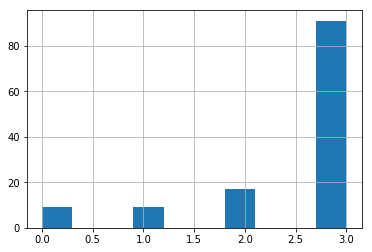

In [110]:
mb_df['topic'].hist()

In [8]:
df = pd.merge(df, user_info[['id', 'screen_name']], how='left', left_on='user_id', right_on='id')

In [46]:
import numpy.random as random

text_data = []
for tweet in tweet_list:
    if random.random() > .8:
        tokens = prepare_text_for_lda_2(tweet)
        text_data.append(tokens)        

In [47]:
text_data[:10]

[['shutting',
  'entire',
  'transit',
  'system',
  'jet',
  'quick',
  'shutting_entire',
  'entire_transit',
  'transit_system',
  'system_jet',
  'jet_quick'],
 ['watching'],
 ['corps',
  'ass',
  'damage',
  'begin',
  'water',
  'infrastructure',
  'thursday',
  'flood',
  'corps_ass',
  'ass_damage',
  'damage_begin',
  'begin_water',
  'water_infrastructure',
  'infrastructure_thursday',
  'thursday_flood'],
 ['graciasadios',
  'tengo',
  'agua,15',
  'muertos',
  'hasta',
  'ahora',
  'tragedia',
  'graciasadios_tengo',
  'tengo_agua,15',
  'agua,15_muertos',
  'muertos_hasta',
  'hasta_ahora',
  'ahora_tragedia'],
 ['.@nbc',
  'windows',
  'burst',
  'glass',
  'rain',
  'street',
  '.@nbc_windows',
  'windows_burst',
  'burst_glass',
  'glass_rain',
  'rain_street'],
 ['power'],
 ['harvard',
  'girl',
  'running',
  'mile',
  'boston',
  'tomorrow',
  'raise',
  'money',
  'relief',
  'donate',
  'harvard_girl',
  'girl_running',
  'running_mile',
  'mile_boston',
  'boston_

In [51]:
len(text_data)

1838

In [10]:
from gensim import corpora

In [48]:
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
# import pickle
# pickle.dump(corpus, open('corpus.pkl', 'wb'))
# dictionary.save('dictionary.gensim')

In [49]:
import gensim
NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=10)


In [53]:
nyc_df.columns

Index(['index', 'tweet_id', 'created_at', 'user_id', 'lat_final', 'lng_final',
       'text', 'mentions', 'id', 'screen_name', 'topic'],
      dtype='object')

In [95]:
from gensim.models import Phrases
from collections import Counter


# Bigram Detector Code!!

In [124]:
def bigram_detector(df, topic):
    bigram = Phrases()
    tweet_topic_list = list(set(df.loc[df['topic']==topic, 'text'].tolist()))
    for tweet in tweet_topic_list:
        tokens = prepare_text_for_lda(tweet)
        bigram.add_vocab([tokens])

    bigram_counter = Counter()
    for key in bigram.vocab.keys():
        if len(str(key).split("_")) > 1:
            bigram_counter[key] += bigram.vocab[key]

    for key, counts in bigram_counter.most_common(20):
        print (key, counts)

In [107]:
bigram_detector(nyc_df, 0.0)

b'empire_state' 34
b'crane_collapse' 28
b'state_building' 28
b'water_flood' 28
b'flood_construction' 28
b'breaking_water' 25
b'staten_island' 24
b'rainbow_today' 23
b'today_offer' 23
b'offer_glimpse' 23
b'evacuation_zone' 22
b'mandatory_evacuation' 21
b'crane_street' 16
b'public_school' 15
b'mayor_bloomberg' 14
b'storm_force' 12
b'force_wind' 12
b'driving_distance' 12
b'menace_cloud' 12
b'tropical_storm' 11


In [85]:
for key in bigram.vocab.keys():
    print(len(str(key).split('_')))
    break

1


In [62]:
len(tweet_topic_list)

2038

In [65]:
bigram[tokens][:30]

/home/jackson/.local/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['breaking', 'mayor', 'order', 'evacuation', 'close', 'school', 'monday']

In [50]:
for topic in topics:
    print(topic)

(0, '0.007*"water" + 0.005*"manhattan" + 0.004*"power" + 0.004*"still" + 0.004*"frankenstorm" + 0.004*"nycmarathon" + 0.004*"brooklyn" + 0.004*"lower" + 0.004*"flood" + 0.003*"storm"')
(1, '0.004*"blackout" + 0.003*"street" + 0.003*"please" + 0.003*"island" + 0.003*"frankenstorm" + 0.003*"queens" + 0.003*"downtown" + 0.003*"aftermath" + 0.003*"bloomberg" + 0.003*"photo"')
(2, '0.007*"power" + 0.004*"water" + 0.004*"bloomberg" + 0.003*"mayor" + 0.003*"without" + 0.003*"battery" + 0.003*"flood" + 0.003*"crane" + 0.003*"manhattan" + 0.003*"frankenstorm"')
(3, '0.008*"photo" + 0.005*"power" + 0.005*"subway" + 0.004*"brooklyn" + 0.004*"today" + 0.003*"flooding" + 0.003*"marathon" + 0.002*"nycmarathon" + 0.002*"state" + 0.002*"times"')


In [45]:
from nltk.util import ngrams

def prepare_text_for_lda_2(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if (len(token) > 4 and token not in stopwords)]
    tokens = [get_lemma(token) for token in tokens]
    tokens = tokens + ["_".join(w) for w in ngrams(tokens, 2)]
    
    return tokens

In [40]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/home/jackson/.local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [15]:
text=nyc_df['text'][0]
bow = dictionary.doc2bow(prepare_text_for_lda(text))
ldamodel[bow]

[(0, 0.31439963),
 (1, 0.041027196),
 (2, 0.04161077),
 (3, 0.56235015),
 (4, 0.040612217)]

In [24]:
nyc_df['text'][0]

'Seems like UES, UWS and most of Brooklyn still has power. #NYC #Sandy'

In [14]:
def get_topic(text):
    bow = dictionary.doc2bow(prepare_text_for_lda(text))
    results = np.array(ldamodel[bow])
    max_ind = np.argmax(results[:, 1])
    topic = results[max_ind, 0]
    return topic


In [23]:
nyc_df['topic'] = nyc_df['text'].apply(get_topic)

In [24]:
nyc_user_topics = nyc_df[['screen_name', 'topic']].groupby(by='screen_name').agg(lambda x:x.value_counts().index[0])

In [25]:
nyc_user_topics

,topic
screen_name,
1017theharbor,2.0
1023WBAB,1.0
11AliveNews,0.0
11th_d,1.0
12knsmith,3.0
13JDAVIS,0.0
13WHAM,2.0
1980beyond,2.0
1Joelchow,0.0


In [17]:
nyc_edge_topic = pd.merge(nyc_edge, nyc_user_topics, left_on='Source', right_index=True)

In [39]:
nyc_edge.shape

(10020, 2)

In [18]:
nyc_df['topic'].value_counts()

0.0    2783
3.0    2465
1.0    2339
4.0    2085
2.0    1805
Name: topic, dtype: int64

In [50]:
node = nyc_edge['Source'].tolist() + nyc_edge['Target'].tolist()
node = list(set(node))
node_df = pd.DataFrame({'Id':node, 'Label':node})
node_df = pd.merge(node_df, nyc_user_topics, how='left', left_on = 'Id', right_index=True)

In [60]:
node_df.columns=['Id', 'Label', 'Modularity Class']
node_df['Modularity Class'] = node_df['Modularity Class'].fillna(5.0)
node_df.to_csv('topic_nodes_nyc.csv')

In [19]:
def frequent_mentions(edge_df):
    most_mentioned = edge_df.groupby(by='Target').count()
    most_mentioned = most_mentioned.sort_values(by='Source', ascending=False)
    return(most_mentioned)

In [20]:
nyc_most = frequent_mentions(nyc_edge)

In [63]:
nyc_df.head()

,index,tweet_id,created_at,user_id,lat_final,lng_final,text,mentions,id,screen_name,topic
0,151,263078854023868417,2012-10-29 20:44:21-04,6332292,38.896076,-77.072225,"Seems like UES, UWS and most of Brooklyn still...",[],6332292.0,ethanklapper,3.0
1,152,263078913251627008,2012-10-29 20:44:35-04,25376735,40.726290,-73.991926,RT @wunderground: The Battery tide gauge shows...,[@wunderground],25376735.0,rickreichmuth,1.0
2,258,265546686145916928,2012-11-05 15:10:38-05,66168463,40.711417,-74.064760,RT @alliemahler: In #NYC? Our @BeSocialChange ...,"[@alliemahler, @BeSocialChange]",66168463.0,WilliamHC3,4.0
3,276,263297806809329665,2012-10-30 11:14:23-04,17125133,38.904148,-77.017094,"@AP roundup: #Sandy leaves 18 deaths, damp and...",[@AP],17125133.0,dbe928,3.0
4,317,263299124064051200,2012-10-30 11:19:37-04,19617453,39.139902,-84.506446,RT @MaraWritesStuff: So excited @realDonaldTru...,"[@MaraWritesStuff, @realDonaldTrump]",19617453.0,JulieFromCinci,4.0


In [46]:
sandy_comm_df = pd.read_csv('sandy_comm.csv')
sandy_comm_df.groupby(by='modularity_class').count().sort_values(by='Id', ascending=False).head(10)

,Id,Label,timeset
modularity_class,,,
0,85228,85228,0
18,493,493,0
9,205,205,0
332,198,198,0
51,177,177,0
133,154,154,0
214,90,90,0
141,83,83,0
238,76,76,0


In [47]:
rel_comms = [18, 9, 332, 51, 133, 214] 

In [111]:
nyc_sent = pd.read_csv('nyc_sentiment.csv')

In [112]:
nyc_sent.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'tweet_id', 'created_at',
       'user_id', 'lat_final', 'lng_final', 'text', 'mentions', 'id',
       'screen_name', 'Id', 'modularity_class', 'sentiment',
       'sentiment_value'],
      dtype='object')

In [114]:
nyc_sent['sentiment'].head()

0    positive
1     neutral
2    positive
3    positive
4    negative
Name: sentiment, dtype: object

In [117]:
neg_tweets = nyc_sent.loc[nyc_sent['sentiment'] == 'negative', 'text'].tolist()

text_data = []
for tweet in neg_tweets:
    tokens = prepare_text_for_lda(tweet)
    text_data.append(tokens)  
        
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=10)


In [118]:
for topic in topics:
    print(topic)

(0, '0.026*"storm" + 0.020*"dangerous" + 0.014*"please" + 0.013*"square" + 0.013*"times" + 0.012*"battery" + 0.012*"evacuation" + 0.011*"conditions" + 0.011*"worse" + 0.011*"subway"')
(1, '0.019*"brooklyn" + 0.018*"subway" + 0.014*"island" + 0.013*"building" + 0.013*"water" + 0.012*"report" + 0.010*"station" + 0.010*"check" + 0.009*"airport" + 0.009*"islip"')
(2, '0.024*"power" + 0.023*"close" + 0.018*"manhattan" + 0.016*"crane" + 0.013*"please" + 0.012*"expect" + 0.012*"still" + 0.010*"dangerous" + 0.010*"tomorrow" + 0.010*"parts"')
(3, '0.018*"photo" + 0.017*"flooding" + 0.012*"frankenstorm" + 0.011*"center" + 0.009*"cloud" + 0.009*"close" + 0.009*"street" + 0.007*"school" + 0.007*"crazy" + 0.007*"queens"')


In [121]:
nyc_neg_df = nyc_sent[nyc_sent['sentiment']=='negative'].copy()
nyc_neg_df['topic'] = nyc_neg_df['text'].apply(get_topic)

In [123]:
nyc_neg_df.head()

,Unnamed: 0,Unnamed: 0.1,index,tweet_id,created_at,user_id,lat_final,lng_final,text,mentions,id,screen_name,Id,modularity_class,sentiment,sentiment_value,topic
4,4,4,37737,263175811664855040,2012-10-30 03:09:37-04,25376735,40.726290,-73.991926,RT @newsbreaker: PHOTO: Dramatic photos of 4-A...,"['@newsbreaker', '@NBCNewYork']",25376735.0,rickreichmuth,rickreichmuth,600,negative,-0.433333,3.0
8,8,8,5370,263792753434042369,2012-10-31 20:01:08-04,17125133,38.904148,-77.017094,RT @Rradiodh: A #shul drying out #Torah #scrol...,['@Rradiodh'],17125133.0,dbe928,dbe928,719,negative,-0.125000,3.0
12,12,12,588,263309472804524035,2012-10-30 12:00:45-04,15113565,38.904148,-77.017094,MT @nycarecs: #USCG rescue swimmer in the stre...,['@nycarecs'],15113565.0,USCG,USCG,427,negative,-0.100000,0.0
14,14,14,2035,263375433372942336,2012-10-30 16:22:51-04,764578974,33.943962,-78.311677,"RT @nycarecs: Photo from #Brooklyn, so sad, ma...",['@nycarecs'],764578974.0,juliebryantHB,juliebryantHB,427,negative,-0.250000,1.0
16,16,16,33928,263066631650029569,2012-10-29 19:55:47-04,764578974,33.943962,-78.311677,RT @nycarecs: ConEd shut down all electricity ...,['@nycarecs'],764578974.0,juliebryantHB,juliebryantHB,427,negative,-0.155556,2.0


In [129]:
bigram_detector(nyc_neg_df, 2.0)

b'lower_manhattan' 9
b'remain_close' 6
b'staten_island' 5
b'mayor_bloomberg' 5
b'emergency_services' 4
b'alert_lower' 4
b'manhattan_submerge' 4
b'public_school' 4
b'school_remain' 4
b'close_tomorrow' 4
b'black_parts' 4
b'parts_empirestate' 4
b'monday_afternoon' 4
b'crane_street' 4
b'street_collapse' 4
b'collapse_dangerous' 4
b'without_power' 4
b'please_case' 3
b'case_emergency' 3
b'services_please' 3
